In [117]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import tensorflow
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler

In [119]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3819,3820,15718289,Bradley,553,Germany,Male,46,3,82291.10,1,1,0,112549.99,1
1532,1533,15589660,Lamble,661,Germany,Female,32,1,145980.23,1,0,1,56636.28,0
6978,6979,15778604,Nicholson,571,France,Female,47,7,0.00,2,0,0,112366.98,0
2610,2611,15729412,Holloway,682,France,Male,38,4,107192.38,1,1,1,15669.17,0
2513,2514,15755825,McGuirk,666,France,Male,39,10,0.00,2,1,0,102999.33,0


In [121]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)

In [123]:
df.shape

(10000, 11)

In [125]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [127]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## Data Visualization

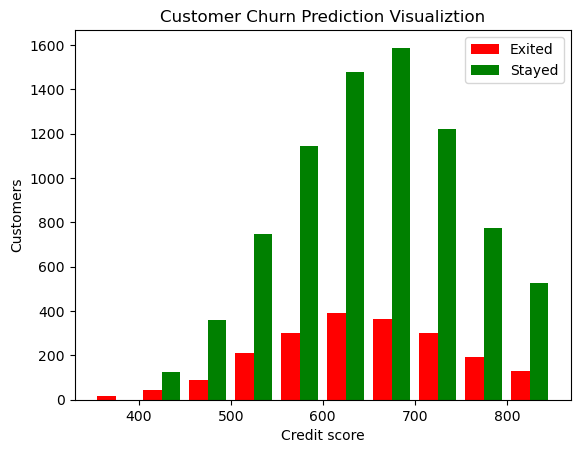

In [130]:
Credit_score_exited = df[df['Exited'] == 1]['CreditScore']
Credit_score_stayed = df[df['Exited'] == 0]['CreditScore']

plt.xlabel('Credit score')
plt.ylabel('Customers')
plt.title('Customer Churn Prediction Visualiztion')

plt.hist([Credit_score_exited, Credit_score_stayed],color = ['red','green'],label = ['Exited','Stayed'])
plt.legend()
plt.show()

## Feature Engineering and Scaling

In [133]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [135]:
pd.set_option('future.no_silent_downcasting', True)  # Enable the new behavior
df.replace({'Female': 0, 'Male': 1}, inplace=True)

In [137]:
df.Gender.unique()

array([0, 1], dtype=object)

## One Hot Encoding

In [140]:
df = (pd.get_dummies(data = df, columns = ['Geography'])).astype(int)

In [142]:
minmax = MinMaxScaler()
columns_to_scale = ['CreditScore', 'Balance','EstimatedSalary', 'Age']

for cols in columns_to_scale:
    df[cols] = minmax.fit_transform(df[[cols]])

In [144]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506733,1,1,0,0
1,0.516,0,0.310811,1,0.334028,1,0,1,0.562708,0,0,0,1
2,0.304,0,0.324324,8,0.636354,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,2,0.500243,1,1,1,0.395403,0,0,0,1


In [146]:
df.drop_duplicates()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,2,0.000000,1,1,1,0.506733,1,1,0,0
1,0.516,0,0.310811,1,0.334028,1,0,1,0.562708,0,0,0,1
2,0.304,0,0.324324,8,0.636354,3,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,1,0.000000,2,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,2,0.500243,1,1,1,0.395403,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,1,0.229730,10,0.228655,1,1,1,0.508488,0,1,0,0
9997,0.718,0,0.243243,7,0.000000,1,0,1,0.210390,1,1,0,0
9998,0.844,1,0.324324,3,0.299225,2,1,0,0.464429,1,0,1,0


In [148]:
X = df.drop('Exited',axis = 'columns')
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [182]:
def model_test(X_train, y_train, X_test, y_test, epochs):
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train.shape[1],)),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(9, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), callbacks=[early_stopping_callback])

    print(f'Accuracy on Test data: {model.evaluate(X_test, y_test)}')

    yp = model.predict(X_test)
    
    # Convert predictions to binary class (0 or 1)
    y_pred = [1 if val >= 0.5 else 0 for val in yp]

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('True values')
    plt.xlabel('Predicted values')
    plt.title('Confusion Matrix of Customer Churn')
    plt.show()

    print(classification_report(y_test, y_pred))

    # Save the model after training
    model.save('churn_model.keras')

    return y_pred

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7935 - loss: 0.5097 - val_accuracy: 0.7975 - val_loss: 0.4887
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7905 - loss: 0.4892 - val_accuracy: 0.7960 - val_loss: 0.4765
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8048 - loss: 0.4599 - val_accuracy: 0.7965 - val_loss: 0.4683
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8001 - loss: 0.4604 - val_accuracy: 0.7990 - val_loss: 0.4604
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8035 - loss: 0.4509 - val_accuracy: 0.8020 - val_loss: 0.4541
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8011 - loss: 0.4562 - val_accuracy: 0.8035 - val_loss: 0.4445
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8058 - loss: 0.4443 - val_accuracy: 0.8045 - val_loss: 0.4463
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8170 - loss: 0.4294 - val_accu

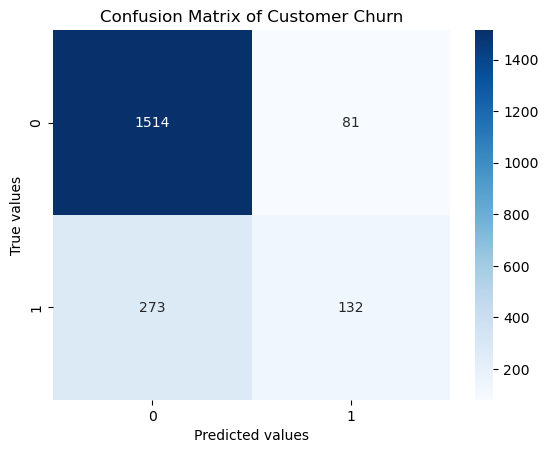

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1595
           1       0.62      0.33      0.43       405

    accuracy                           0.82      2000
   macro avg       0.73      0.64      0.66      2000
weighted avg       0.80      0.82      0.80      2000



In [184]:
y_pred = model_test(X_train,y_train,X_test,y_test,100)

#### Class label 0 is giving a good prediction unlike class label 1, as the dataset is not that good

## Data oversampling using SMOTE

In [188]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_resample(X, y)

In [190]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 5)

Epoch 1/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6142 - loss: 0.6629 - val_accuracy: 0.6604 - val_loss: 0.6310
Epoch 2/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6627 - loss: 0.6209 - val_accuracy: 0.6761 - val_loss: 0.6038
Epoch 3/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6846 - loss: 0.5977 - val_accuracy: 0.7097 - val_loss: 0.5835
Epoch 4/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7051 - loss: 0.5794 - val_accuracy: 0.7188 - val_loss: 0.5686
Epoch 5/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7040 - loss: 0.5732 - val_accuracy: 0.7247 - val_loss: 0.5566
Epoch 6/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7122 - loss: 0.5649 - val_accuracy: 0.7279 - val_loss: 0.5515
Epoch 7/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7273 - loss: 0.5483 - val_accuracy: 0.7367 - val_loss: 0.5407
Epoch 8/100
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7284 - loss: 0.5450 - val_accu

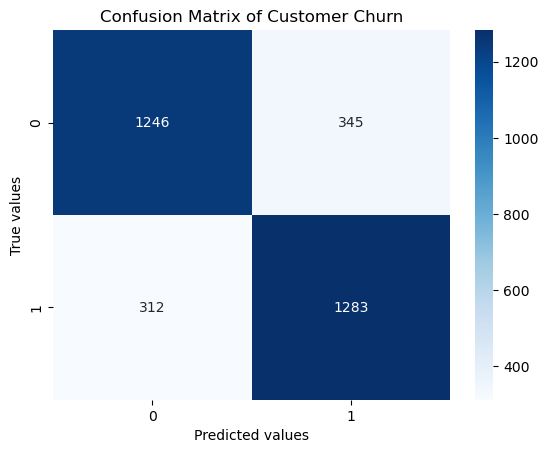

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1591
           1       0.79      0.80      0.80      1595

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [192]:
y_pred_smote = model_test(X_train_smote, y_train_smote, X_test_smote, y_test_smote, 100)

#### We got better scores for class label 1 using SMOTE.